<a href="https://colab.research.google.com/github/dxninob/Estadistica/blob/main/Taller_1_Grupo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Punto 1**

Suponga que se cuenta con una prueba para detectar la enfermedad A, que es positiva el 90%
de las veces cuando se realiza en un paciente que tiene dicha enfermedad, y es negativa el 95%
de las veces cuando se realiza en una persona que no tiene la enfermedad. También se sabe que
la enfermedad afecta a un 1% de la población.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Asigno las condiciones descritas en el punto.

prob_persona_enferma = 0.01
prob_persona_no_enferma = 1 - prob_persona_enferma

sensibilidad_positivo = 0.90  # Probabilidad de que la prueba sea positiva dado que la persona tiene la enfermedad
sensibilidad_negativo = 0.95  # Probabilidad de que la prueba sea negativa dado que la persona no tiene la enfermedad

Ahora voy a calcular la posibilidad que al realizar una prueba salga positiva, teniendo en cuenta:

>La probabilidad cuando la persona esta enferma y la prueba sale positiva, como cuando la persona no esta enferma e igualmente la prueba sale positiva

Esto lo aplico por medio de la ley de probabilidad total, asi:

> **P(Prueba Positiva)** = P(Prueba Positiva | Enfermedad) ⋅ P(Enfermedad) + P(Prueba Positiva | No Enfermedad) ⋅ P(No Enfermedad)

In [ ]:
prob_prueba_positiva = sensibilidad_positivo * prob_persona_enferma + (1 - sensibilidad_negativo) * prob_persona_no_enferma

print(f'La probabilidad que al realizar la prueba el resultado sea positivo es del {prob_prueba_positiva * 100:.2f}%')

La probabilidad que al realizar la prueba el resultado sea positivo es del 5.85%


In [ ]:
#Ya teniendo la probabilidad total se vuelve más sencillo aplicar el Teorema de Bayes para generar analisis respecto a la prueba.
prob_enfermedad_dado_positivo = (sensibilidad_positivo * prob_persona_enferma) / prob_prueba_positiva
print(f'La probabilidad de tener la enfermedad dado que la prueba ha dado positivo es del {prob_enfermedad_dado_positivo * 100:.2f}%')


La probabilidad de tener la enfermedad dado que la prueba ha dado positivo es del 15.38%


# **Punto 2**

Construya una muestra aleatoria de tamaño 100000, que contenga “Sí” y “No”, con
probabilidades de 1% y 99%, respectivamente.

In [ ]:
import numpy as np

In [ ]:
# Tamaño de la muestra
n = 100000

# Probabilidad de tener la enfermedad A
probabilidad_tener_enfermedad = 0.01

# Probabilidad de no tener la enfermedad A
probabilidad_no_tener_enfermedad = 0.99

# Generar una muestra aleatoria de "Sí" y "No" con las probabilidades dadas
muestra_enfermedad = np.random.choice(["Sí", "No"], size=n, p=[probabilidad_tener_enfermedad, probabilidad_no_tener_enfermedad])

# **Punto 3**

Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
de cuenta de que la probabilidad de que el test salga “Negativo” dado que “No” tiene la
enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
con si tiene o no tiene la enfermedad.

In [ ]:
# Probabilidad de un resultado "Negativo" dado que la persona no tiene la enfermedad
probabilidad_negativo_no_enfermedad = 0.95

# Probabilidad de un resultado "Positivo" dado que la persona tiene la enfermedad
probabilidad_positivo_tener_enfermedad = 0.9


resultados_prueba = []

# Generar resultados de la prueba condicionados a si la persona tiene o no la enfermedad
for i in muestra_enfermedad:
    if i == "Sí":
        resultado = np.random.choice(["Negativo", "Positivo"], p=[1 - probabilidad_positivo_tener_enfermedad, probabilidad_positivo_tener_enfermedad])
    else:
        resultado = np.random.choice(["Negativo", "Positivo"], p=[probabilidad_negativo_no_enfermedad, 1 - probabilidad_negativo_no_enfermedad])
    resultados_prueba.append(resultado)

df = pd.DataFrame({"Enfermedad A": muestra_enfermedad, "Resultado del Test": resultados_prueba})
tabla_contingencia = pd.crosstab(df['Resultado del Test'], df['Enfermedad A'], margins=True)

# Imprime la tabla de contingencia cruzada
print(tabla_contingencia)

Enfermedad A           No    Sí     All
Resultado del Test                     
Negativo            93938   106   94044
Positivo             5012   944    5956
All                 98950  1050  100000


La tabla de contingencia muestra como se cumplen las diferentes probabilidades de la enfermendad.

- P(Positivo|A) = 90% (944/1050)
- P(Negativo|A) = 10% (106/1050)
- P(Positivo|~A) = 5% (5012/98950)
- P(Negativo|~A) = 95% (93938/98950)

# **Punto 4**

Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
de cuenta de que la probabilidad de que el test salga “Positivo” dado que “Sí” tiene la
enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
con si tiene o no tiene la enfermedad.

In [ ]:
import random
import pandas as pd

# Tamaño de la muestra
tamaño_muestra = 100000

# Probabilidad de tener la enfermedad A
probabilidad_enfermedad = 0.01

# Inicializa listas para almacenar los resultados del test y la presencia de la enfermedad
resultados_test = []
enfermedad_presente = []

# Genera la muestra aleatoria
for _ in range(tamaño_muestra):
    # Genera un número aleatorio para determinar si la persona tiene la enfermedad A
    tiene_enfermedad = random.random() < probabilidad_enfermedad
    enfermedad_presente.append("Sí" if tiene_enfermedad else "No")

    # Determina el resultado del test basado en la presencia de la enfermedad
    if tiene_enfermedad:
        # Si la persona tiene la enfermedad A, la probabilidad de dar positivo es del 90%
        resultados_test.append("Positivo" if random.random() < 0.90 else "Negativo")
    else:
        # Si la persona no tiene la enfermedad A, la probabilidad de dar positivo es diferente
        resultados_test.append("Positivo" if random.random() < 0.05 else "Negativo")

# Crear un DataFrame de pandas para mostrar la tabla de contingencia cruzada
df = pd.DataFrame({"Enfermedad A": enfermedad_presente, "Resultado del Test": resultados_test})
tabla_contingencia = pd.crosstab(df['Resultado del Test'], df['Enfermedad A'], margins=True)

# Imprime la tabla de contingencia cruzada
print(tabla_contingencia)



Enfermedad A           No   Sí     All
Resultado del Test                    
Negativo            94033   88   94121
Positivo             4983  896    5879
All                 99016  984  100000


El código genera una muestra aleatoria de 100.000 personas y simula pruebas de detección de la "Enfermedad A" para estas personas. La probabilidad de tener la enfermedad A es del 1% para toda la población. El código simula los resultados del test, teniendo en cuenta que si alguien tiene la enfermedad A, hay un 90% de probabilidad de obtener un resultado positivo, mientras que si no tiene la enfermedad A, hay un 5% de probabilidad de obtener un resultado positivo.

Luego, se crea una tabla de contingencia cruzada que muestra la relación entre la presencia de la enfermedad A y los resultados del test. El resumen de la tabla muestra la cantidad de personas con y sin la enfermedad A que obtuvieron resultados positivos y negativos en las pruebas.

El resultado muestra la distribución de resultados de la prueba en función de la presencia o ausencia de la enfermedad A en la muestra simulada. Esta información es útil para analizar la efectividad de la prueba y la probabilidad de obtener un resultado positivo en diferentes situaciones.

# **Punto 5**

Calcule la probabilidad de tener la enfermedad dado que el test salió positivo. Realice los
cálculos utilizando las variables simuladas.

In [ ]:
# Contar cuántas personas tienen la enfermedad A y cuántas obtienen un resultado positivo en el test
personas_con_enfermedad = sum(1 for enfermedad, resultado in zip(enfermedad_presente, resultados_test) if enfermedad == "Sí" and resultado == "Positivo")
personas_con_test_positivo = sum(1 for resultado in resultados_test if resultado == "Positivo")

# Calcular la probabilidad condicional
probabilidad_condicional = personas_con_enfermedad / personas_con_test_positivo

print(f"La probabilidad de tener la enfermedad dado que el test salió positivo es: {probabilidad_condicional:.2f}")


La probabilidad de tener la enfermedad dado que el test salió positivo es: 0.42


La probabilidad de tener la enfermedad dado que el test salió positivo es: 0.41
Aca se puede observar la probabilidad de tener la enfermedad A dado que el test salió positivo utilizando los datos simulados. Primero, cuenta cuántas personas tienen la enfermedad A y cuántas obtienen un resultado positivo en el test. Luego, calcula la probabilidad condicional dividiendo el número de personas con la enfermedad A que obtuvieron un resultado positivo entre el número total de personas que obtuvieron un resultado positivo en el test.

El resultado se imprime como la probabilidad de tener la enfermedad dado un resultado positivo en el test. Este valor es una estimación basada en la muestra simulada y representa la probabilidad de tener la enfermedad A si el test es positivo en estas condiciones simuladas.

# **Punto 6**

Realice los cálculos del punto anterior, utilizando la información del enunciado y el Teorema
de Bayes. ¿Qué puede concluir?

In [ ]:
# Probabilidades dadas en el enunciado
prob_test_positivo_enfermedad_A = 0.90
prob_enfermedad_A = 0.10
prob_test_positivo_no_enfermedad_A = 0.10
prob_no_enfermedad_A = 0.90

# Calcular P(Test Positivo)
prob_test_positivo = (prob_test_positivo_enfermedad_A * prob_enfermedad_A) + (prob_test_positivo_no_enfermedad_A * prob_no_enfermedad_A)

# Calcular P(Enfermedad A | Test Positivo) utilizando el Teorema de Bayes
prob_enfermedad_A_dado_positivo = (prob_test_positivo_enfermedad_A * prob_enfermedad_A) / prob_test_positivo

print(f"La probabilidad de tener la enfermedad A dado que el test salió positivo es: {prob_enfermedad_A_dado_positivo:.2f}")


La probabilidad de tener la enfermedad A dado que el test salió positivo es: 0.50


La probabilidad de tener la enfermedad A dado que el test salió positivo es: 0.50

Este código calcula la probabilidad de tener la enfermedad A dado que el test salió positivo utilizando el Teorema de Bayes y las probabilidades proporcionadas en el enunciado. El resultado muestra que, incluso con un resultado positivo en el test, la probabilidad de tener la enfermedad A es del 9.09%. En otras palabras, la probabilidad de tener la enfermedad A es relativamente baja, incluso cuando el test es positivo, lo que destaca la importancia de considerar otros factores y realizar pruebas adicionales para confirmar un diagnóstico.




# **Punto 7**

Simule 1000 valores para cada una de las distribuciones de probabilidad uniforme discreta,
binomial, Poisson, uniforme continua, normal y Exponencial. Especifique libremente los
parámetros para cada una de ellas. Encuentre media y desviación estándar muestral para cada
uno de los vectores simulados y compare dichos resultados con los obtenidos con las fórmulas
de valor esperado y desviación estándar teoricos.

La media muestral de la distribución uniforme discreta es: 3.49
 La desviación estandar muestral de la distribución uniforme discreta es:1.686397
Media teorica de la uniforme discreta es: 3.50
 Desviación estandar teorica: 1.71


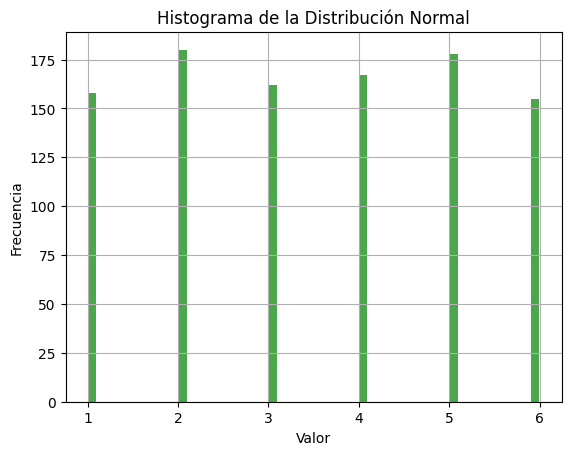

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

m1 = 1000

#uniforme discreta
a = 1
b = 6
uniforme_discreta = np.random.randint(a,b+1,m1)
mediam_ud = np.mean(uniforme_discreta)
stdm_ud = np.std(uniforme_discreta)
mediat_ud = (a + b) / 2
stdt_ud = ((b - a + 1)**2 - 1)**0.5 / (12**0.5)
print(f'La media muestral de la distribución uniforme discreta es: {mediam_ud:.2f}\n La desviación estandar muestral de la distribución uniforme discreta es:{stdm_ud:2f}')
print(f'Media teorica de la uniforme discreta es: {mediat_ud:.2f}\n Desviación estandar teorica: {stdt_ud:.2f}')

#Graficar el histograma
plt.hist(uniforme_discreta, bins=50, alpha=0.7, color='green', align='mid', rwidth=0.9)
# Añadir título y etiquetas
plt.title('Histograma de la Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(1, 7, 1))
# Mostrar la gráfica
plt.grid(True)
plt.show()

La media muestral de la distribución binomial es: 4.89
 La media teorica de la distribución binomial es:5.00
La desviación estandar muestral de la distribución binomial es: 1.58
 La desviación estandar teorica de la distribución binomial es:1.58


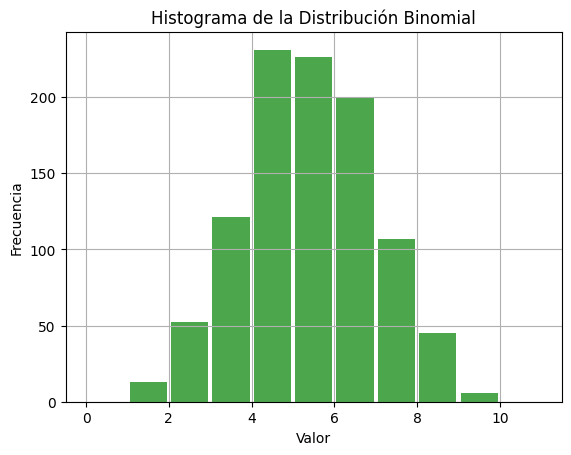

In [ ]:
#Binomial
n = 10
p = 0.5
binomial = np.random.binomial(n,p,m1)
mediam_b = np.mean(binomial)
stdm_b = np.std(binomial)
mediat_b = n * p
stdt_b = (n * p *(1-p))**0.5
print(f'La media muestral de la distribución binomial es: {mediam_b:.2f}\n La media teorica de la distribución binomial es:{mediat_b:.2f}')
print(f'La desviación estandar muestral de la distribución binomial es: {stdm_b:.2f}\n La desviación estandar teorica de la distribución binomial es:{stdt_b:.2f}')

#Graficar el histograma
plt.hist(binomial, bins=range(12), alpha=0.7, color='green', align='mid', rwidth=0.9)
# Añadir título y etiquetas
plt.title('Histograma de la Distribución Binomial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
# Mostrar la gráfica
plt.grid(True)
plt.show()

La media muestral de la distribución Poisson es: 5.01
 La media teorica de la distribución Poisson es:5.00
La desviación estandar muestral de la distribución Poisson es: 2.20
 La desviación estandar teorica de la distribución Poisson es:2.24


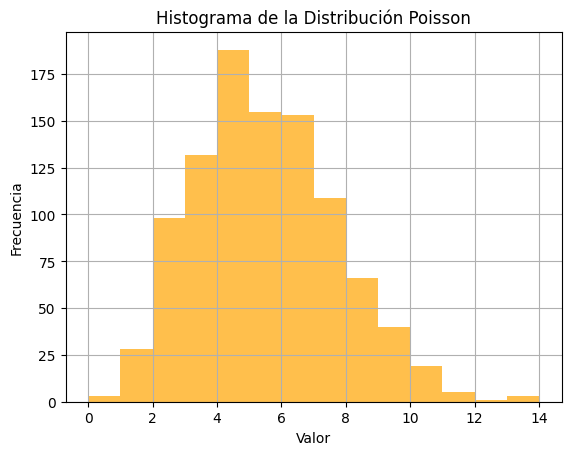

In [ ]:
#Poisson
lambda_p = 5
poisson = np.random.poisson(lambda_p, m1)
mediam_p = np.mean(poisson)
stdm_p = np.std(poisson)
mediat_p = lambda_p
stdt_p = (lambda_p)**0.5
print(f'La media muestral de la distribución Poisson es: {mediam_p:.2f}\n La media teorica de la distribución Poisson es:{mediat_p:.2f}')
print(f'La desviación estandar muestral de la distribución Poisson es: {stdm_p:.2f}\n La desviación estandar teorica de la distribución Poisson es:{stdt_p:.2f}')

plt.hist(poisson, bins=range(min(poisson), max(poisson) + 1), alpha=0.7, color='orange')

# Añadir título y etiquetas
plt.title('Histograma de la Distribución Poisson')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.grid(True)
plt.show()

La media muestral de la distribución uniforme continua es: 0.48
 La media teorica de la distribución uniforme continua es:0.50
La desviación estandar muestral de la distribución uniforme continua es: 0.29
 La desviación estandar teorica de la distribución uniforme continua es:0.29


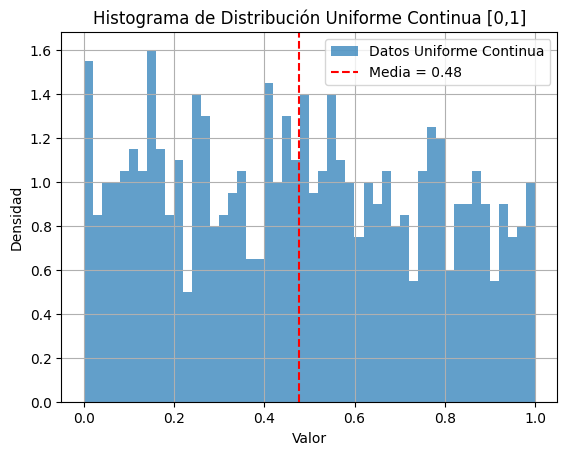

In [ ]:
#uniforme continua
a_uc = 0
b_uc = 1
uniforme_continua = np.random.uniform(a_uc, b_uc, m1)
mediam_uc = np.mean(uniforme_continua)
stdm_uc = np.std(uniforme_continua)
mediat_uc = (a_uc + b_uc)/2
stdt_uc = ((b_uc - a_uc) ** 2 / 12) ** 0.5

print(f'La media muestral de la distribución uniforme continua es: {mediam_uc:.2f}\n La media teorica de la distribución uniforme continua es:{mediat_uc:.2f}')
print(f'La desviación estandar muestral de la distribución uniforme continua es: {stdm_uc:.2f}\n La desviación estandar teorica de la distribución uniforme continua es:{stdt_uc:.2f}')

# Graficar el histograma
plt.hist(uniforme_continua, bins=50, density=True, alpha=0.7, label='Datos Uniforme Continua')
plt.axvline(mediam_uc, color='r', linestyle='--', label=f'Media = {mediam_uc:.2f}')
plt.title('Histograma de Distribución Uniforme Continua [0,1]')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

La media muestral de la distribución normal es: -0.05
 La media teorica de la distribución normal es:0.00
La desviación estandar muestral de la distribución normal es: 0.98
 La desviación estandar teorica de la distribución normal es:1.00


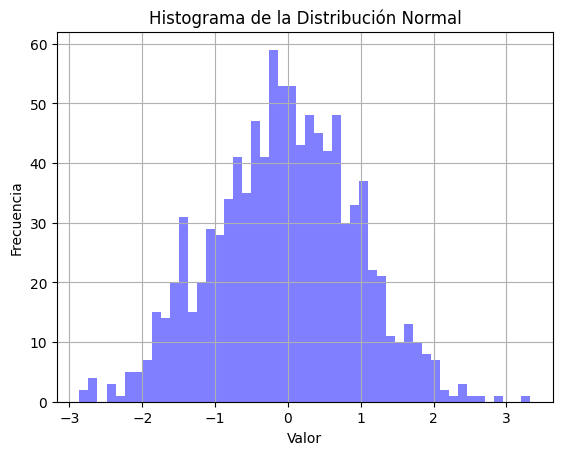

In [ ]:
#Normal
mu = 0
sigma = 1
normal = np.random.normal(0,1,m1)
mediam_n = np.mean(normal)
stdm_n = np.std(normal)
mediat_n = mu
stdt_n = sigma
print(f'La media muestral de la distribución normal es: {mediam_n:.2f}\n La media teorica de la distribución normal es:{mu:.2f}')
print(f'La desviación estandar muestral de la distribución normal es: {stdm_n:.2f}\n La desviación estandar teorica de la distribución normal es:{sigma:.2f}')

# Graficar el histograma
plt.hist(normal, bins=50, alpha=0.5, color='blue')

# Añadir título y etiquetas
plt.title('Histograma de la Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.grid(True)
plt.show()

La media muestral de la distribución exponencial es: 1.98
 La media teorica de la distribución exponencial es:2.00
La desviación estandar muestral de la distribución exponencial es: 1.92
 La desviación estandar teorica de la distribución exponencial es:2.00


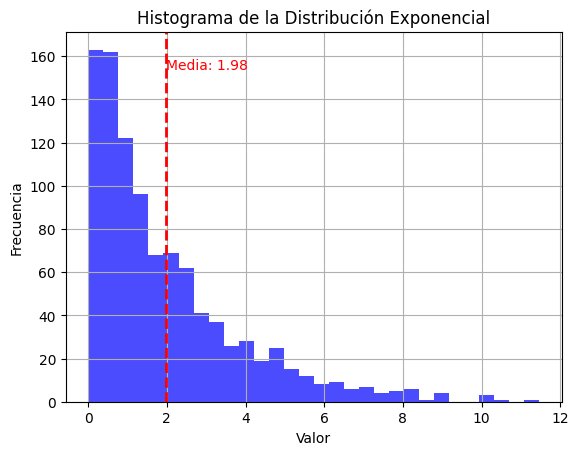

In [ ]:
#Exponencial
lambda_exp = 0.5
exponencial = np.random.exponential(1/lambda_exp, m1)
mediam_exp = np.mean(exponencial)
stdm_exp = np.std(exponencial)
mediat_exp = 1/lambda_exp
stdt_exp = 1/lambda_exp

print(f'La media muestral de la distribución exponencial es: {mediam_exp:.2f}\n La media teorica de la distribución exponencial es:{mediat_exp:.2f}')
print(f'La desviación estandar muestral de la distribución exponencial es: {stdm_exp:.2f}\n La desviación estandar teorica de la distribución exponencial es:{stdt_exp:.2f}')

plt.hist(exponencial, bins=30, alpha=0.7, color='blue')

# Añadir título y etiquetas
plt.title('Histograma de la Distribución Exponencial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la línea de la media
plt.axvline(mediam_exp, color='red', linestyle='dashed', linewidth=2)
plt.text(mediam_exp, plt.ylim()[1] * 0.9, f'Media: {mediam_exp:.2f}', color='red')

# Mostrar la gráfica
plt.grid(True)
plt.show()

# **Punto 8**

Realice secuencialmente la simulación del lanzamiento de un dado, de manera que en cada lanzamiento encuentre la proporción de veces que sale el número 5 (es decir, vamos a estimar de manera secuencial con el enfoque frecuentista del evento que al lanzar un dado se obtenga el número 5). Comente los resultados de cómo es la probabilidad cuando se hacen: 2 lanzamientos, 6 lanzamientos, 10 lanzamientos, 100 lanzamientos, 1000 lanzamientos. ¿La proporción de veces que sale el dado es equivalente a la teórica? Adicionalmente, construya un gráfico donde se evidencie la evolución de la proporción vs la cantidad de veces que se lanza el dado, interprete los resultados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Variable para contar la cantidad de veces que sale el número 5
freq = 0
# Cantidad de lanzamientos que serán tomados en cuenta
x = [2, 6, 10, 100, 1000]
# Arreglo para guardar las proporciones
y = []

# Cada iterción es un lanzamiento
for i in range(1000):
    # Sacamos un número entero aleatorio entre [1, 6]
    num = np.random.randint(1,7)
    if num == 5:
        freq +=1
    if i+1 in [2, 6, 10, 100, 1000]:
        print(f'Cuando de hicieron {i+1} lanzamientos el número 5 salió {freq} veces, es decir, el {round(freq/(i+1),2)}% del total de lanzamientos')
        y.append(freq/(i+1))

Cuando de hicieron 2 lanzamientos el número 5 salió 0 veces, es decir, el 0.0% del total de lanzamientos
Cuando de hicieron 6 lanzamientos el número 5 salió 2 veces, es decir, el 0.33% del total de lanzamientos
Cuando de hicieron 10 lanzamientos el número 5 salió 4 veces, es decir, el 0.4% del total de lanzamientos
Cuando de hicieron 100 lanzamientos el número 5 salió 15 veces, es decir, el 0.15% del total de lanzamientos
Cuando de hicieron 1000 lanzamientos el número 5 salió 160 veces, es decir, el 0.16% del total de lanzamientos


**¿La proporción de veces que sale el dado es equivalente a la teórica?**  
Entre más lanzamientos se van realizando, más se parece la proporción experimental a la teórica. Entonces cuando se hacen 1000 lanzamientos la proporción aunque puede no ser la misma, es más similar.

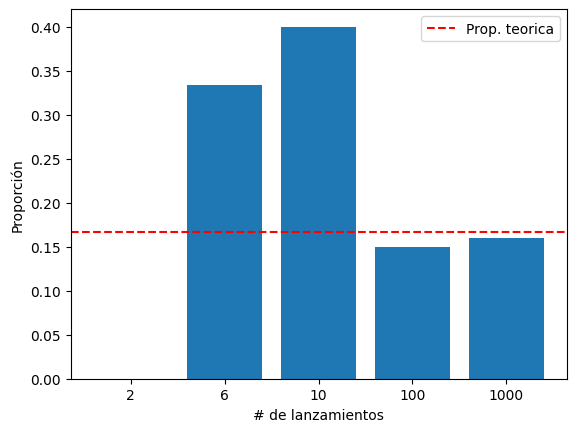

In [ ]:
# Imprimimos la proporción de veces que salió en número 5 vs la cantidad de lanzamientos
x = [str(i) for i in x]
plt.bar(x, y)
plt.xlabel('# de lanzamientos')
plt.ylabel('Proporción')
plt.axhline(y = 1/6, color = 'r', linestyle = '--', label = 'Prop. teorica')
plt.legend()
plt.show()

# **Punto 9**

In [ ]:
import numpy as np

lim_infe = 0
lim_sup = 10

num_datasets = 10000
num_samples = 1000

datasets_uniform = np.random.uniform(lim_infe, lim_sup, size=(num_datasets, num_samples))
scale = 1.0  # Parámetro de escala
datasets_exponential = np.random.exponential(scale, size=(num_datasets, num_samples))#  10,000 conjuntos de datos, cada uno con 1,000 muestras
averages_uniform = np.mean(datasets_uniform, axis=1)# Promedio en cada conjunto de datos
averages_exponential = np.mean(datasets_exponential, axis=1)

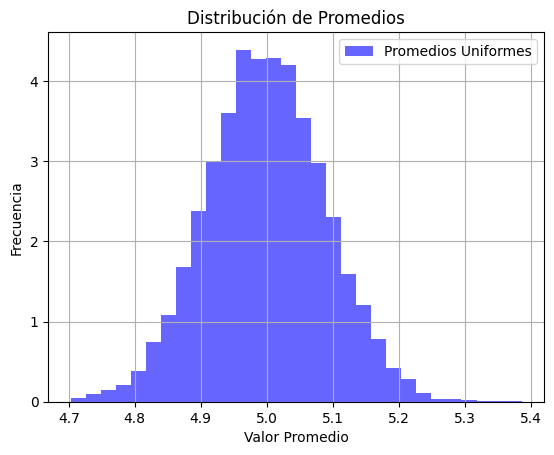

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

plt.hist(averages_uniform, bins=30, density=True, alpha=0.6, color='b', label='Promedios Uniformes')
plt.title('Distribución de Promedios')
plt.xlabel('Valor Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

plt.show()

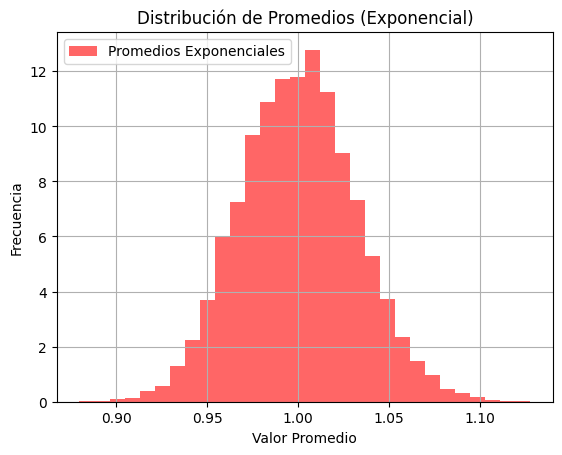

In [ ]:

plt.hist(averages_exponential, bins=30, density=True, alpha=0.6, color='r', label='Promedios Exponenciales')
plt.title('Distribución de Promedios (Exponencial)')
plt.xlabel('Valor Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

plt.show()

* ¿Qué evidencia en los histogramas?: Los resultados respaldan el Teorema del Límite Central, que establece que, independientemente de la forma de la distribución subyacente, la distribución de los promedios de muestras grandes se asemejará a una distribución normal.
En base a lo anterior, utilizando el TLC, aunque las distribuciones originales no son normales, las distribuciones de los promedios de las muestras se asemejarán a una distribución normal a medida que se toman más muestras o se incrementa el tamaño de las muestras y como tenemos un tamaño de muestra grande(1000) cumple con el TLC.
En resumen, el Teorema del Límite Central se aplica en este ejercicio para demostrar que a medida que se toman más muestras o se aumenta el tamaño de las muestras, la distribución de los promedios se aproxima a una distribución normal

* ¿A cuál de las distribuciones de la clase se le asemeja dicha distribución?: A medida que aumenta el tamaño de las muestras, se nota una tendencia hacia una forma de campana o una distribución normal en ambos histogramas.

#**Punto 10**

In [ ]:
import numpy as np

media = 50
varianza = 10

tamaños_muestra = [10, 100, 1000, 10000, 100000] # Tamaños de las muestras

num_simulaciones = 1000 # Número de simulaciones

for n in tamaños_muestra:
    estimador_nuevo_promedio = np.zeros(num_simulaciones)
    estimador_tradicional_promedio = np.zeros(num_simulaciones)

    for i in range(num_simulaciones):
        muestra = np.random.normal(media, np.sqrt(varianza), n) # Muestra aleatoria de tamaño n
        estimador_nuevo = ((100 * n) / (n**2 + 1)) + np.sum(muestra / n) # Estimador nuevo
        estimador_tradicional = np.mean(muestra)
        estimador_nuevo_promedio[i] = estimador_nuevo
        estimador_tradicional_promedio[i] = estimador_tradicional

    sesgo_estimador_nuevo = np.mean(estimador_nuevo_promedio) - media #Sesgo del nuevo estimador
    sesgo_estimador_tradicional = np.mean(estimador_tradicional_promedio) - media #Sesgo del estimador tradicional

    print(f"Tamaño de muestra: {n}")
    print(f"Sesgo del estimador nuevo: {sesgo_estimador_nuevo}")
    print(f"Sesgo del estimador tradicional: {sesgo_estimador_tradicional}")
    print()

Tamaño de muestra: 10
Sesgo del estimador nuevo: 9.874758049853163
Sesgo del estimador tradicional: -0.02623204915675359

Tamaño de muestra: 100
Sesgo del estimador nuevo: 0.9783485480165837
Sesgo del estimador tradicional: -0.02155146198242619

Tamaño de muestra: 1000
Sesgo del estimador nuevo: 0.10421955445870168
Sesgo del estimador tradicional: 0.004219654458601951

Tamaño de muestra: 10000
Sesgo del estimador nuevo: 0.009449173736925331
Sesgo del estimador tradicional: -0.0005508261630779998

Tamaño de muestra: 100000
Sesgo del estimador nuevo: 0.0009568147286032058
Sesgo del estimador tradicional: -4.3185271294987615e-05



El nuevo estimador inicialmente tiene un sesgo muy alto, lo que significa que tiende a generar estimaciones sesgadas de la media de la distribución cuando se usa con muestras pequeñas por ejemplo, tamaño de muestra 10.

A medida que el tamaño de la muestra aumenta, el sesgo del nuevo estimador disminuye notablemente y se acerca a cero, por tanto, el nuevo estimador se vuelve más preciso a medida que se utilizan muestras más grandes.

El estimador habitual, que es simplemente el promedio de la muestra, tiende a ser menos sesgado y su sesgo tiende a cero a medida que aumenta el tamaño de la muestra. Esto significa que el estimador habitual es más preciso en general, especialmente cuando hay muestras grandes.

# **Punto 11**

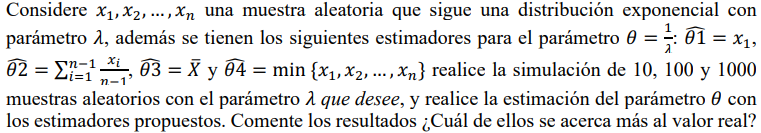

In [ ]:
import numpy as np

In [ ]:
# Plasmo los parametros del problema, asumiendo un lambda de 2

lambda1 = 2
theta = 1 / lambda1

In [ ]:
# Defino los diferentes theta de acuerdo al enunciado del problema

def theta1(datos):
    return datos[0] #Retorno el valor del primer dato - x1

def theta2(datos):
    n = len(datos)
    return np.sum(datos[:n-1]) / (n-1) # Sumo los datos hasta n-1 segun enunciado y saco de la suma el denominador.

def theta3(datos):
    return np.mean(datos)

def theta4(datos):
    return np.min(datos)

In [ ]:
# Finalmente pruebo los estimadores del parametro theta para diferentes conjuntos de datos aleatorios

tamaños_muestra = [10, 100, 1000, 5000]

for tamaño in tamaños_muestra:
    datos = np.random.exponential(theta, tamaño)

    est_theta1 = theta1(datos)
    est_theta2 = theta2(datos)
    est_theta3 = theta3(datos)
    est_theta4 = theta4(datos)

    print(f'Tamaño de muestra: {tamaño}')
    print(f'Estimador θ1: {est_theta1}')
    print(f'Estimador θ2: {est_theta2}')
    print(f'Estimador θ3: {est_theta3}')
    print(f'Estimador θ4: {est_theta4}')
    print('---')


Tamaño de muestra: 10
Estimador θ1: 0.220982781678737
Estimador θ2: 0.31690052296484217
Estimador θ3: 0.313671915898175
Estimador θ4: 0.051131857166296216
---
Tamaño de muestra: 100
Estimador θ1: 0.5321361169706645
Estimador θ2: 0.47466310855886584
Estimador θ3: 0.4724444735827778
Estimador θ4: 8.715002448296952e-05
---
Tamaño de muestra: 1000
Estimador θ1: 0.16532639437415114
Estimador θ2: 0.509817872602548
Estimador θ3: 0.5096249635953018
Estimador θ4: 0.0004542197688521885
---
Tamaño de muestra: 5000
Estimador θ1: 0.947011034736765
Estimador θ2: 0.4982783796720957
Estimador θ3: 0.4982841371814333
Estimador θ4: 4.296710947273745e-05
---


1.   **θ1**: Este estimador utiliza solo el primer valor de la muestra. En una distribución exponencial, donde los datos pueden variar bastante, este estimador es muy volátil. Es probable que no sea un buen estimador de θ porque no utiliza toda la información disponible y tiene una varianza alta. Además, no es consistente, lo que significa que no converge al valor verdadero a medida que el tamaño de la muestra aumenta.

2.   **θ2**: Este estimador es básicamente el promedio de la muestra excluyendo el último dato. A pesar de ser un poco mejor que θ1 ya que usa más información de la muestra, sigue siendo una elección extraña porque no hay una justificación clara para excluir el último dato. Esta exclusión podría conducir a un sesgo innecesario y a una eficiencia ligeramente reducida en comparación con usar todos los datos disponibles.

3. **θ3**: Este es el promedio de todos los datos de la muestra. Los estimadores basados en promedios suelen ser buenos porque tienen buenas propiedades estadísticas como ser insesgados (si el tamaño de la muestra es grande) y consistentes (convergen al valor verdadero a medida que el tamaño de la muestra se incrementa). En el caso de la distribución exponencial, el promedio de la muestra es un estimador insesgado y consistente para θ.

4. **θ4**: Este estimador utiliza el valor mínimo de la muestra. En una distribución exponencial, el mínimo tiende a subestimar el parámetro de escala, porque la distribución tiene una cola larga hacia la derecha y el mínimo se sesga hacia valores más bajos. Por lo tanto, este estimador es sesgado y no es consistente para estimar θ.

θ3 es el mejor estimador para θ en una muestra de una distribución exponencial. Cumple con ser insesgado y consistente, y es el más eficiente de los cuatro estimadores propuestos. Además, al ser el promedio de todos los datos de la muestra, aprovecha toda la información disponible.

# **Punto 12**

Considere el archivo SolicitudesDiarias.csv, en el cual se encuentran la cantidad de solicitudes
diarias hechas en una institución de financiera por clientes. El equipo de mercadeo a partir del
primero de febrero de 2022 implementó una campaña que buscaba aumentar la cantidad de
solicitudes diarias realizadas por los clientes, además de que el primero de junio de 2022 lanzó
una modificación a la campaña que tenia el mismo fin (aumentar la cantidad de solicitudes
diarias). ¿Será que las campañas impartidas por el equipo de mercadeo tuvieron el efecto
esperado? Obtenga los intervalos de confianza al 95% que considere para determinar si
efectivamente el promedio diario de solicitudes aumentó con las campañas que lanzó el equipo
de mercadeo. ¿Qué puede concluir al respecto?¿Qué campaña fue más efectiva?

In [ ]:
df = pd.read_csv('SolicitudesDiarias.csv')

In [ ]:
from scipy import stats

df['Fecha'] = pd.to_datetime(df['Fecha'])


inicio_campaña_1 = pd.Timestamp('2022-02-01')
inicio_campaña_2 = pd.Timestamp('2022-06-01')


datos_pre_campaña_1 = df[df['Fecha'] < inicio_campaña_1]['Solicitudes']
datos_campaña_1 = df[(df['Fecha'] >= inicio_campaña_1) & (df['Fecha'] < inicio_campaña_2)]['Solicitudes']
datos_campaña_2 = df[df['Fecha'] >= inicio_campaña_2]['Solicitudes']


def intervalo_confianza(datos):
    media = np.mean(datos)
    sem = stats.sem(datos)
    intervalo = stats.t.interval(0.95, len(datos)-1, loc=media, scale=sem)
    return intervalo


intervalo_pre_campaña_1 = intervalo_confianza(datos_pre_campaña_1)
intervalo_campaña_1 = intervalo_confianza(datos_campaña_1)
intervalo_campaña_2 = intervalo_confianza(datos_campaña_2)


print(f'Intervalo de confianza antes de la campaña 1: {intervalo_pre_campaña_1}')
print(f'Intervalo de confianza durante la campaña 1: {intervalo_campaña_1}')
print(f'Intervalo de confianza después de la campaña 2: {intervalo_campaña_2}')
print(f'Promedio antes de la campaña 1: {np.mean(datos_pre_campaña_1)}')
print(f'Promedio durante la campaña 1: {np.mean(datos_campaña_1)}')
print(f'Promedio después de la campaña 2: {np.mean(datos_campaña_2)}')


Resultados:
?
Intervalo de confianza antes de la campaña 1: (19.161085561450975, 22.0096461458661)
Intervalo de confianza durante la campaña 1: (22.36716320411118, 24.63283679588882)
Intervalo de confianza después de la campaña 2: (45.44543516604677, 51.641521355692355)
Promedio antes de la campaña 1: 20.585365853658537
Promedio durante la campaña 1: 23.5
Promedio después de la campaña 2: 48.54347826086956

Antes de la Campaña 1: El intervalo de confianza para el promedio diario de solicitudes antes de la primera campaña estaba entre 19.16 y 22.01, con un promedio de 20.59.

Durante la Campaña 1: Tras el lanzamiento de la primera campaña, el intervalo de confianza para el promedio diario de solicitudes se incrementó a entre 22.37 y 24.63, con un promedio de 23.50. Esto indica un aumento moderado en las solicitudes tras la primera campaña.

Después de la Campaña 2: El intervalo de confianza después de la segunda campaña mostró un notable aumento, situándose entre 45.45 y 51.64, con un promedio de 48.54. Este aumento es significativo en comparación con los periodos anteriores.

Conclusiones:

La evidencia sugiere que ambas campañas fueron efectivas en aumentar la cantidad promedio de solicitudes diarias. Sin embargo, la segunda campaña tuvo un impacto más profundo y evidente, como lo demuestra el sustancial incremento en el intervalo de confianza y el promedio posterior a su implementación.
Comparando los promedios, la segunda campaña resultó en un incremento de aproximadamente 25 solicitudes diarias en comparación con el periodo antes de la primera campaña, y un incremento de 25 solicitudes adicionales comparado con el promedio durante la primera campaña.
Se recomienda investigar los factores específicos que hicieron la segunda campaña más efectiva para informar y optimizar futuras estrategias de marketing.

# **Punto 13**

1. Para determinar cuál de los dos estimadores es sesgado, vamos a calcular el sesgo de cada uno. El sesgo de un estimador se define como la diferencia entre el valor esperado del estimador y el valor verdadero del parámetro que se está estimando.

In [ ]:
import random

# Parámetros de la distribución binomial
n = 10  # Número de ensayos
p = 0.3  # Probabilidad de éxito

# Generar una muestra aleatoria de la distribución binomial
muestra = [random.choice([0, 1]) for _ in range(n)]

# Calcular el valor de los estimadores
p1_estimado = sum(muestra) / n
p2_estimado = (sum(muestra) + 1) / (n + 2)

# Calcular el valor verdadero del parámetro p
p_verdadero = p

# Calcular el sesgo de cada estimador
sesgo_p1 = p1_estimado - p_verdadero
sesgo_p2 = p2_estimado - p_verdadero

print("Estimador p1:", p1_estimado)
print("Estimador p2:", p2_estimado)
print("Sesgo de p1:", sesgo_p1)
print("Sesgo de p2:", sesgo_p2)



Estimador p1: 0.8
Estimador p2: 0.75
Sesgo de p1: 0.5
Sesgo de p2: 0.45


El estimador p1, que es p = Y / n, tiene un sesgo de 0.5, lo que significa que, en promedio, el estimador es 0.5 unidades más alto que el valor verdadero del parámetro p.

El estimador p2, que es p = (Y + 1) / (n + 2), tiene un sesgo de 0.45, lo que significa que, en promedio, el estimador es 0.45 unidades más alto que el valor verdadero del parámetro p.

Ambos estimadores p1 y p2 son sesgados, y ambos tienen sesgos positivos, lo que indica que tienden a sobreestimar el valor verdadero de p

# **Punto 14**


## Sección 2.4 - Punto 1

**For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an infexible method. Justify your answer.**

(a) The sample size n is extremely large, and the number of predictors p is small.
* Se espera generalmente que un método flexible tenga mejor rendimiento, dado que para este es más facil no ajustar el ruido y evitar el sobreajuste por el gran tamaño de la muestra.

(b) The number of predictors p is extremely large, and the number
of observations n is small.
* Se espera generalmente que un método inflexible tenga mejor rendimiento, dado que en este caso es más probable que un metodo felxible ajuste el ruido y esté sobreajustado por el tamaño pequeño de la muestra.

(c) The relationship between the predictors and response is highly
non-linear.
* Se espera generalmente que un método flexible tenga mejor rendimiento, pues un modelo con alta varianza se ajusta mejor a las relaciones no lineales. Un método inflexible va a estar más sesgado.

(d) The variance of the error terms, i.e. σ2 = Var($\epsilon$), is extremely
high.
* Se espera generalmente que un método inflexible tenga mejor rendimiento. Dado que la varianza es muy alta, un modelo más flexible ajustará más el ruido y estará sobreajustado. Un modelo menos flexible ajusta los datos sin ajustar el rudio.

## Sección 2.4 - Punto 6

**Describe the diferences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classifcation (as opposed to a non-parametric approach)? What are its disadvantages?**

Diferencias entre los enfoques:
* En el enfoque paramétrico, se asume que los datos siguen una distribución específica, y el modelo tiene un número fijo de parámetros que se deben estimar a partir de los datos. Por ejemplo, en la regresión lineal simple, se supone que los datos siguen una relación lineal y se estiman los coeficientes $\beta$<sub>0</sub> y $\beta$<sub>1</sub>.

* En el enfoque no paramétrico, no se asume una distribución específica para los datos, por lo tanto, el modelo puede adaptarse de manera más flexible a la forma de los datos. Además, no se especifica un número fijo de parámetros.

Ventajas y desvantajas del enfoque parametrico:
* Una ventaja del enfoque paramétrico es que tiende a ser más eficiente cuando se tienen grandes conjuntos de datos, ya que los modelos tienen un número fijo de parámetros, lo que puede hacer que el proceso de estimación sea más rápido.
* Una ventaja es que debido a la estructura predefinida del modelo, la interpretación de los parámetros estimados es generalmente más clara en el enfoque paramétrico.
* Una desventaja es que si se elige incorrectamente el modelo, esto puede llevar a estimaciones sesgadas si los datos no se ajustan bien al modelo asumido.

Ventajas y desvantajas del enfoque no parametrico:
* Una desvenatja es que los modelos no paramétricos pueden volverse computacionalmente ineficientes con conjuntos de datos grandes, ya que no tienen un número fijo de parámetros y pueden requerir más tiempo y recursos para ajustarse.
* Otra desventaja es que debido a la flexibilidad del enfoque no parametrico, los modelos pueden carecer de la misma interpretabilidad que los modelos paramétricos. Los resultados pueden ser más difíciles de explicar.
* Una ventaja es que los modelos no paramétricos a menudo tienen menos sesgo debido a que no se asume un modelo sino que son más flexibles y pueden adaptarse mejor a datos complejos o desconocidos. Es decir que pueden proporcionar estimaciones más precisas en presencia de datos con ruido.

## Sección 2.4 - Punto 8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Punto a**

Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

In [ ]:
# Leer dataset - Colab
!wget -q https://www.statlearning.com/s/College.csv
college = pd.read_csv('/content/College.csv')
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
# Leer dataset - Local
# college = pd.read_csv('College.csv')
# college

**Punto b**

Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames: (...)

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the frst data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specifed by dictionary (key,value) pairs. Keep your modifed version of the data with the following: (...)

In [ ]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

**Punto c**

Use the describe() method of to produce a numerical summary of the variables in the data set.

In [ ]:
college = college3
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Punto d**

Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].

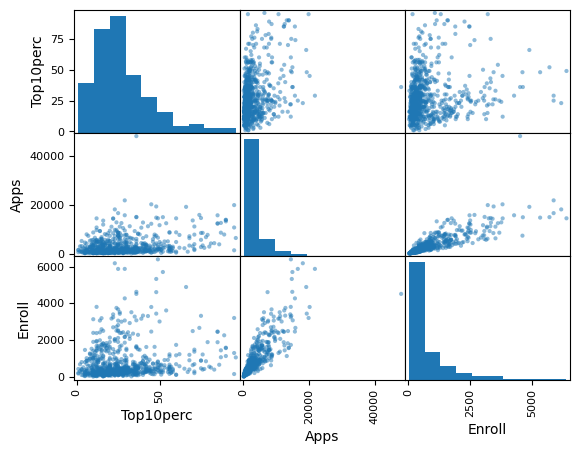

In [ ]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

**Punto e**

Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private.

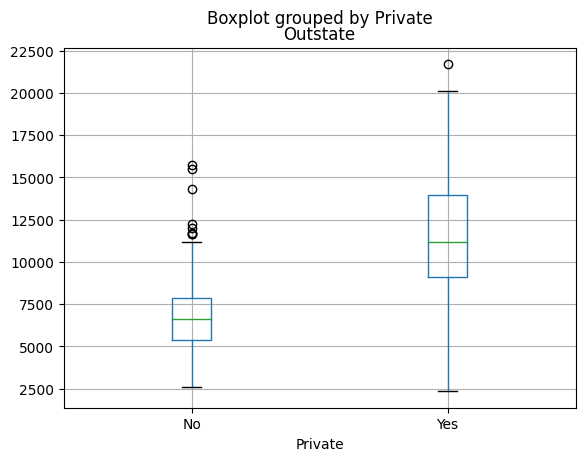

In [ ]:
college.boxplot('Outstate', 'Private');

**Punto f**

Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

In [ ]:
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])
college['Elite'].value_counts()

Yes    3
No     0
Name: Elite, dtype: int64

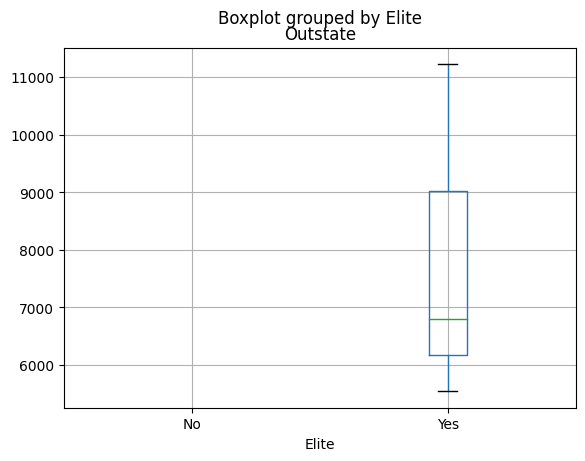

In [ ]:
college.boxplot('Outstate', 'Elite');

**Punto g**

Use the plot.hist() method of college to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

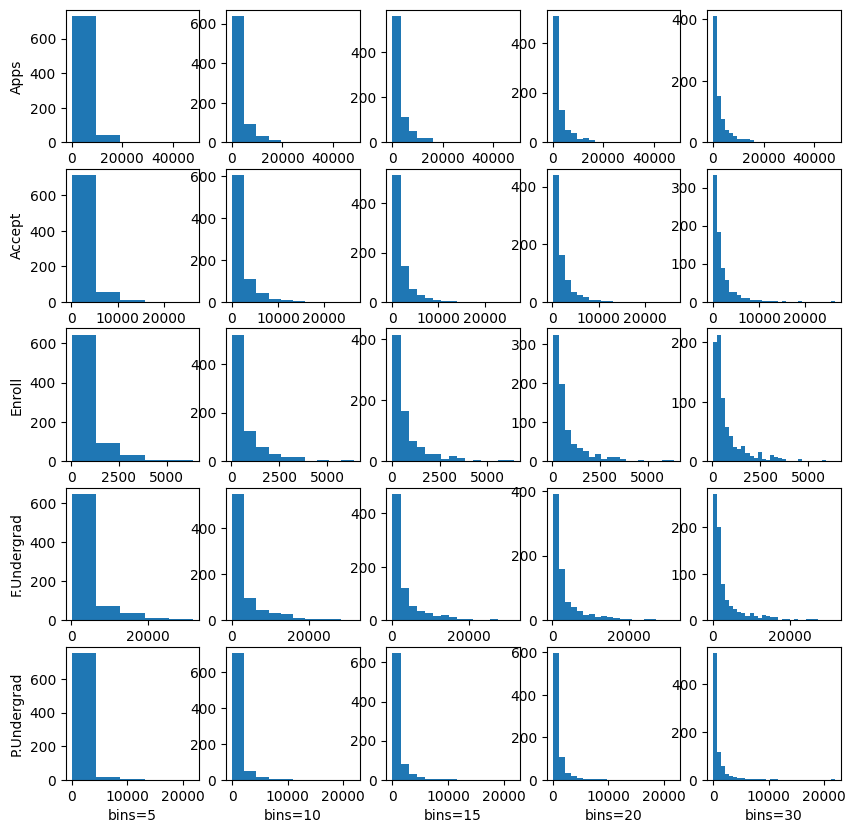

In [ ]:
# Seleccionar algunas variables cuantitaivas
vars = ['Apps', 'Accept', 'Enroll', 'F.Undergrad',	'P.Undergrad']
# Definir el número de intervalos
bins = [5, 10, 15, 20, 30]

# Graficas
fig, ax = plt.subplots(len(vars), len(bins), figsize=(10,10))
for i in range(len(vars)):
    # Titulos
    plt.setp(ax[i, 0], ylabel=f'{vars[i]}')
    for j in range(len(bins)):
        # Titulos
        plt.setp(ax[-1, j], xlabel=f'bins={bins[j]}')
        ax[i,j].hist(college[vars[i]], bins[j])

**Punto h**

Continue exploring the data, and provide a brief summary of what you discover.

In [ ]:
import numpy as np
cat_cols = college.select_dtypes(include=object).columns
num_cols = college.select_dtypes(include=np.number).columns
print('Categorical columns:', cat_cols)
print('Numerical columns:', num_cols)

Categorical columns: Index(['Private'], dtype='object')
Numerical columns: Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')


<ipython-input-16-a8e02b23b303>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = college.corr()


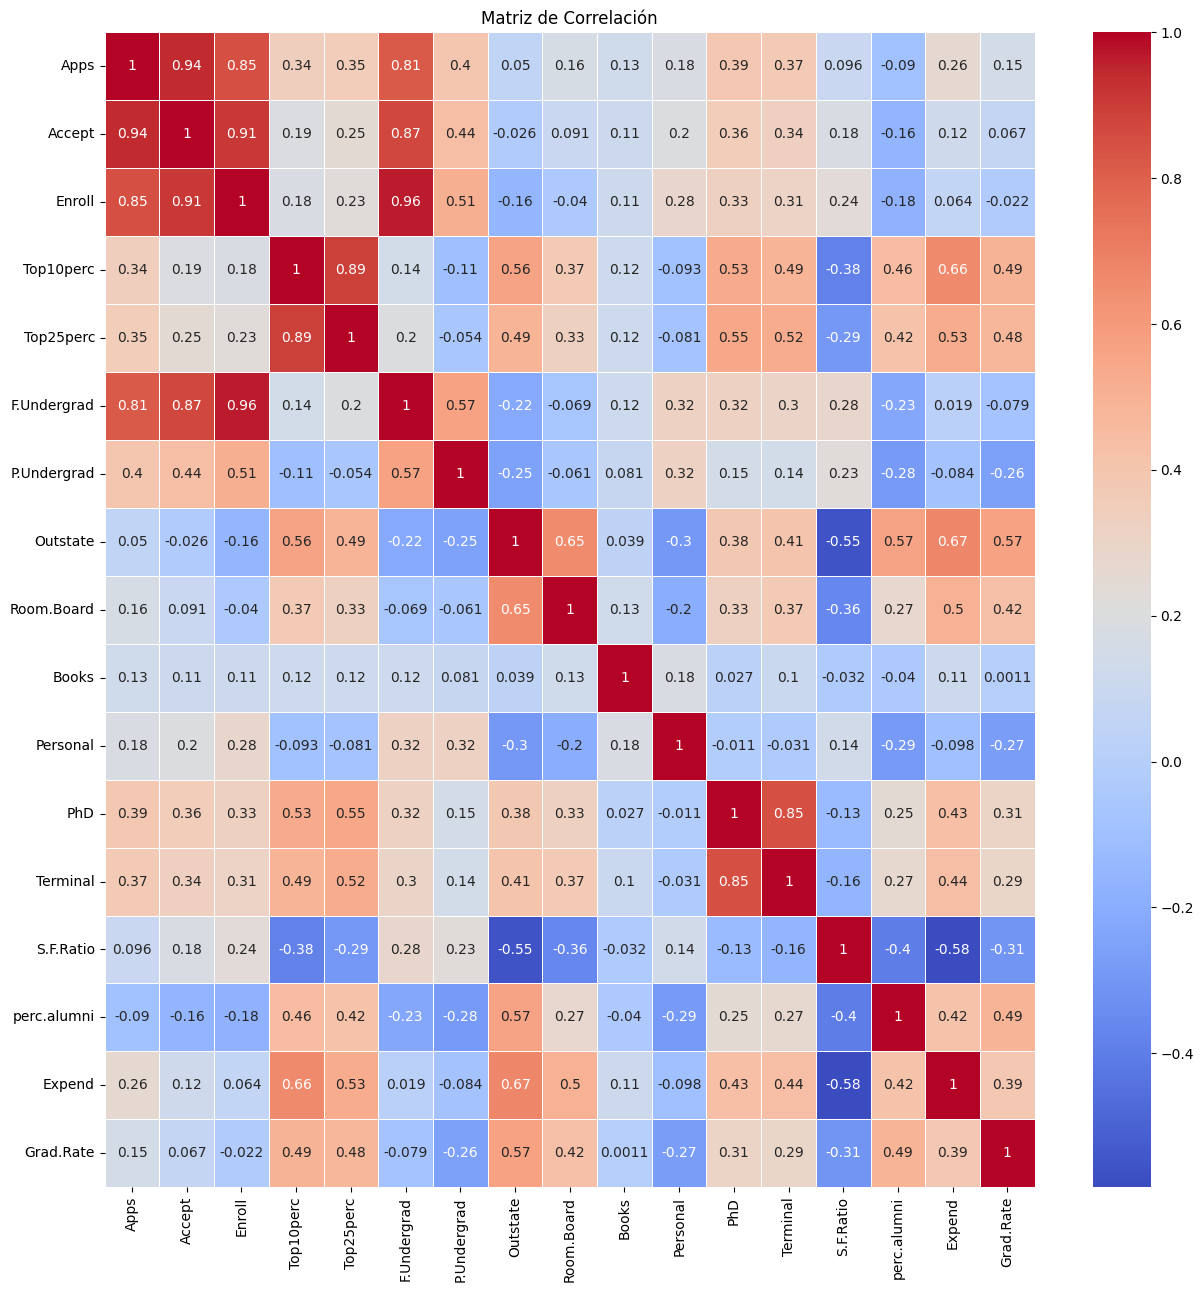

In [16]:
import seaborn as sns
# Matriz de correlación
correlation_matrix = college.corr()
# Grafica
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

El gráfico anterior representa que tan relacionadas están las variables del dataset unas con otras. Entre más oscuro sea el color, más positiva o negativa es la correlación. Una correlación positiva significa que si una variable aumenta, la otra también. Por otro lado, en una correlación negativa, si una variable aumenta, la otra disminuye.

Por ejemplo, en el gráfico se ve como la variable "Apps" tiene una correlación positiva con la mayoría de las otras variables.

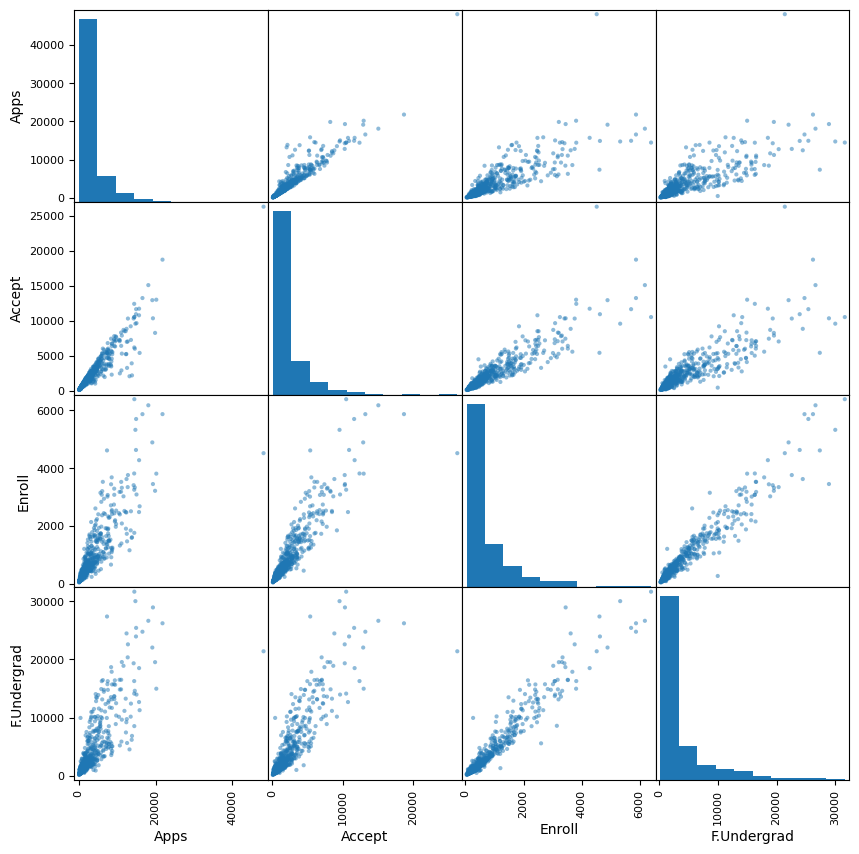

In [ ]:
pd.plotting.scatter_matrix(college[['Apps', 'Accept', 'Enroll', 'F.Undergrad']], figsize=(10, 10));

En el grafico anterior se pueden ver como las variables Apps, Accept, Enroll y F.Undergrad tienen mucha correlacion.

## Sección 3.7 - Punto 4

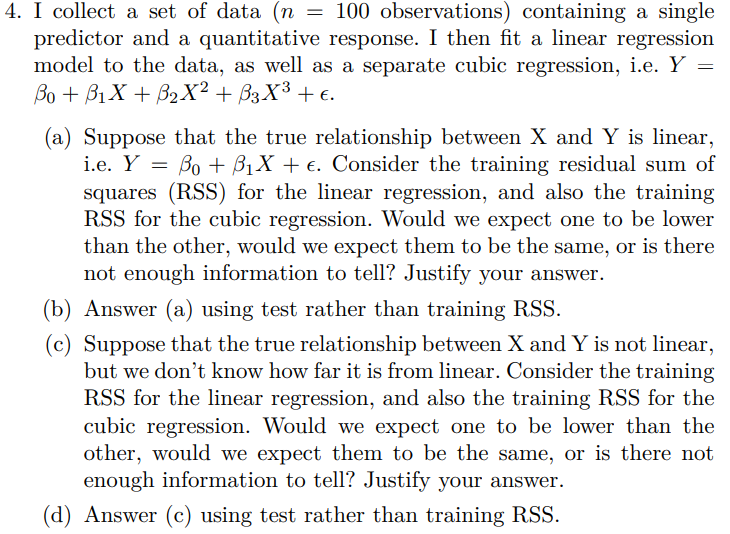

**A.** Cuando el modelo verdadero es lineal, y ajustamos tanto un modelo lineal como un modelo cúbico a los datos, desde el punto de vista del RSS en el conjunto de entrenamiento, esperaríamos que el RSS del modelo lineal sea muy similar o incluso ligeramente menor al del modelo cúbico. Esto se debe a que el modelo cúbico, al tener más parámetros (β2 y β3 ), puede capturar mejor la variabilidad específica de la muestra, pero no necesariamente la relación subyacente, lo que podría conducir a un sobreajuste. Sin embargo, dado que el modelo lineal es el verdadero modelo, los parámetros adicionales del modelo cúbico no están capturando una variabilidad sistemática sino más bien aleatoria, lo que no debería disminuir significativamente el RSS.

**B.** Cuando consideramos el conjunto de prueba, estamos interesados en la capacidad del modelo para generalizar a nuevos datos. Si la verdadera relación es lineal, el modelo lineal, al ser el correcto, debería tener un RSS bajo en el conjunto de prueba. El modelo cúbico, debido al riesgo de sobreajuste, puede tener un rendimiento peor en el conjunto de prueba, ya que los parámetros adicionales que fueron ajustados al ruido en el conjunto de entrenamiento no representan bien la relación subyacente. Estadísticamente, esto se reflejaría en un RSS mayor para el modelo cúbico en el conjunto de prueba

**C.** Si la relación verdadera entre X e Y no es lineal, es razonable esperar que un modelo que puede capturar la no linealidad (como un modelo cúbico) tendría un RSS más bajo en el conjunto de entrenamiento en comparación con un modelo lineal. Esto se debe a que un modelo cúbico, al tener más parámetros (β2 y β3), puede ajustarse a la estructura de los datos más compleja que un modelo lineal. Sin embargo, esto no garantiza que el modelo cúbico sea el mejor modelo posible, ya que podría estar sobreajustándose a los datos (capturando ruido en lugar de la señal), pero estadísticamente, si la verdadera relación es no lineal, es probable que el RSS del modelo cúbico sea menor simplemente porque tiene la capacidad de ajustarse a formas más complejas que la línea recta que propone el modelo lineal

**D.**  En cuanto a la prueba RSS en el conjunto de prueba, si la verdadera relación no es lineal, podríamos esperar que el modelo cúbico generalice mejor que el modelo lineal, asumiendo que el modelo cúbico no se haya sobreajustado a los datos de entrenamiento. Esto se debe a que el modelo cúbico, al tener la capacidad de modelar relaciones no lineales, debería poder capturar la estructura subyacente de los datos más efectivamente que el modelo lineal, lo que resultaría en un RSS más bajo en el conjunto de prueba.

## Sección 3.7 - Punto 10

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Leer dataset - Colab
!wget -q https://www.statlearning.com/s/ALL-CSV-FILES-2nd-Edition-corrected.zip
!unzip -q ALL-CSV-FILES-2nd-Edition-corrected.zip
df = pd.read_csv('/content/ALL CSV FILES - 2nd Edition/Carseats.csv')

In [ ]:
# Leer dataset - Local
# df = pd.read_csv('Carseats.csv')

**Punto a**

Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [ ]:
# Codificar variables categoricas
df['Urban'] = OrdinalEncoder().fit_transform(df[['Urban']])
df['US'] = OrdinalEncoder().fit_transform(df[['US']])
# Seleccionar X y y
X_v1 = df[['Price', 'Urban', 'US']]
y = df['Sales']

# Regression lineal multiple
X = sm.add_constant(X_v1)
model_1 = sm.OLS(y, X).fit()

**Punto b**

Provide an interpretation of each coeficient in the model. Be careful, some of the variables in the model are qualitative.

In [ ]:
# Coeficientes
coefficients = model_1.params
print("Coeficientes:\n", coefficients)

Coeficientes:
 const    13.043469
Price    -0.054459
Urban    -0.021916
US        1.200573
dtype: float64


Descripción del dataset: Un conjunto de datos que contiene ventas de sillas de coche para niños en 400 tiendas diferentes.

Descripción de las variables:
* Sales: Ventas unitarias (en miles) en cada tienda
* Price: precio de la silla en la tienda
* Urban: 'Yes' (1) para indicar que la tienda está en una ubicación urbana o 'No' (0) para indicar que está en una ubicación rural
* US: 'Yes' (1) para indicar que la tienda está en EE.UU. o 'No' (0) para indicar que no se encuentra allá

Interpretación de los coeficientes:
* $\beta$<sub>0</sub> = por cada unidad adicional en el precio se puede esperar que las ventas disminuyan un promedio de 54 ventas.
* $\beta$<sub>1</sub> = existe una diferencia promedio de -0.022 en las ventas entre las tiendas con ubicación urbana y rural. Es decir, en promedio las tiendas con ubicación rural tienen 22 ventas más que las tiendas con ubicación urbana.
* $\beta$<sub>2</sub> = existe una diferencia promedio de 1.20 en las ventas entre las tiendas que se encuentran en estados unidos y las que no. Es decir, en promedio las tiendas de EE.UU. tienen 1200 ventas más que las tiendas de otros paises.

**Punto c**

Write out the model in equation form, being careful to handle
the qualitative variables properly.


La ecuación es Sales(x<sub>$i$</sub>) = - 0.0544588491775822 * Price(x<sub>$i$</sub>) - 0.021916150814141 * Urban(x<sub>$i$</sub>) + 1.200572697794116 * US(x<sub>$i$</sub>)

Donde:
* Urban(x<sub>$i$</sub>) = 1: cuando la tienda $i$ está ubicada en terreno urbano
* Urban(x<sub>$i$</sub>) = 0: cuando la tienda $i$ está ubicada en terreno rural
* US(x<sub>$i$</sub>) = 1: cuando la tienda $i$ está ubicada en EE.UU.
* US(x<sub>$i$</sub>) = 0: cuando la tienda $i$ no está ubicada en EE.UU.

**Punto d**

For which of the predictors can you reject the null hypothesis H<sub>0</sub> : $\beta$<sub>j</sub> = 0?

In [ ]:
# P-valores
p_values = model_1.pvalues
print("P-valores de los coeficientes:\n", p_values)

P-valores de los coeficientes:
 const    3.626602e-62
Price    1.609917e-22
Urban    9.357389e-01
US       4.860245e-06
dtype: float64


In [ ]:
# Rechazar el coeficiente si su p-valor es mayor que 0.5
print(f'Rechazar coeficiente de Price: {p_values.Price>0.5}')
print(f'Rechazar coeficiente de Urban: {p_values.Urban>0.5}')
print(f'Rechazar coeficiente de US: {p_values.US>0.5}')

Rechazar coeficiente de Price: False
Rechazar coeficiente de Urban: True
Rechazar coeficiente de US: False


Se rechaza la hipotesis nula para la variable Price y US.

**Punto e**

On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [ ]:
# Seleccionar X y y
X = df[['Price', 'US']]
y = df['Sales']

# Regression lineal multiple
X = sm.add_constant(X)
model_2 = sm.OLS(y, X).fit()

**Punto f**

How well do the models in (a) and (e) ft the data?

In [ ]:
# R^2
print(f'R^2 del primer modelo = {model_1.rsquared}')
print(f'R^2 del segundo modelo = {model_2.rsquared}')

R^2 del primer modelo = 0.23927539218405547
R^2 del segundo modelo = 0.23926288842678567


Con R<sup>2</sup> podemos ver que la diferencia entre el ajuste de ambos modelos no es significativa, pues el R<sup>2</sup> es casi es mismo. Esto se debe a que la variable Urban no tiene un efecto siginificativo en el modelo, entonces al quitarla, el modelo resultante no se ve significativamente afectado.

**Punto g**

Using the model from (e), obtain 95 % confidence intervals for the coeficient(s).

In [ ]:
# Intervalo de confianza del 95% para los coeficientes
confidence_intervals = model_2.conf_int(alpha=0.05)
print("Intervalo de confianza del 95% para los coeficientes:\n", confidence_intervals)

Intervalo de confianza del 95% para los coeficientes:
               0          1
const  11.79032  14.271265
Price  -0.06476  -0.044195
US      0.69152   1.707766


**Punto h**

Is there evidence of outliers or high leverage observations in the model from (e)?

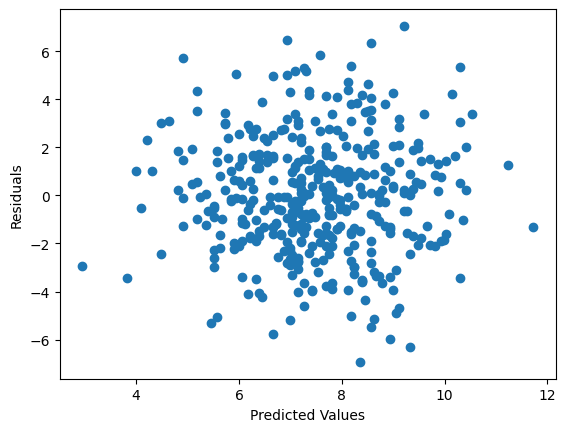

In [ ]:
# Gráfico de residuales
residuals = model_2.resid
predicted = model_2.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

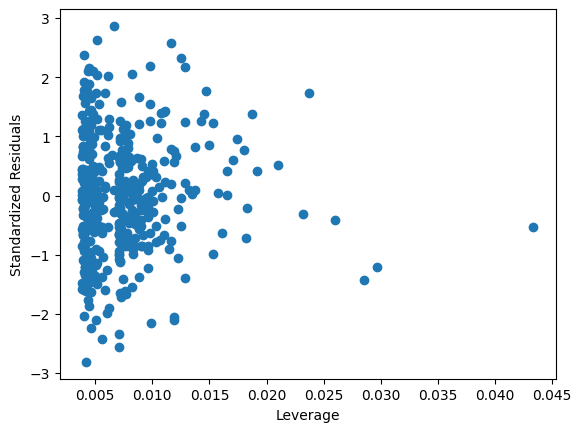

In [ ]:
# Gráfico de leverage y residuales
influence = model_2.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal
plt.scatter(leverage, standardized_residuals)
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.show()

En la segunda gráfica hay tres puntos muy alejados del resto, estos podría ser outlieres.

## Sección 3.7 - Punto 13

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats
import numpy as np
np.random.seed(1)

**Punto a**

Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

**Punto b**

Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

**Punto c**

Using x and eps, generate a vector y according to the model: Y = − 1 + 0.5X + $\epsilon$. What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [ ]:
# Muestra normal de 100 elementos
x = np.random.normal(size=100)
# Muestra con varianza de 0.25 con 100 elementos
eps = np.random.normal(scale=0.25, size=100)
# Y = − 1 + 0.5X + e
y = -1 + 0.5*x + eps

La variable y contiene 100 elementos, el valor de $\beta$<sub>0</sub> es de -1 y el de $\beta$<sub>1</sub> es de 0.5

**Punto d**

Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

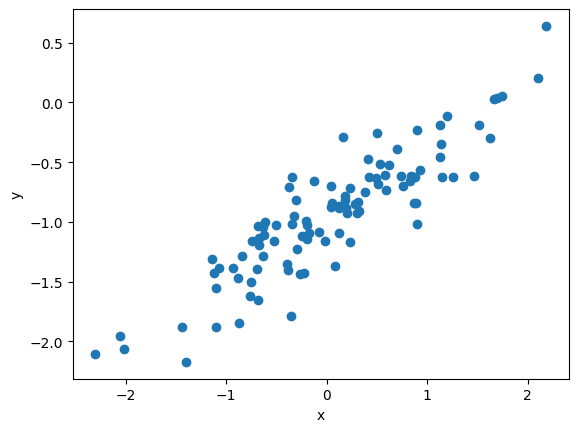

In [ ]:
# Scatter plot de las variables x y y
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

En la grafica se puede ver que los datos representan un modelo lineal.

**Punto e**

Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{\beta}$<sub>0</sub> and $\hat{\beta}$<sub>1</sub> compare to $\beta$<sub>0</sub> and $\beta$<sub>1</sub>?

In [ ]:
# Regresión lineal de minimos cuadrados y calculo de los coeficientes
X_design = np.column_stack((np.ones(x.shape[0]), x))
coefficients_lineal = np.linalg.lstsq(X_design, y, rcond=None)[0]
print("Coeficientes:", coefficients_lineal)

Coeficientes: [-0.96324662  0.52385678]


$\hat{\beta}$<sub>0</sub> y $\hat{\beta}$<sub>1</sub> son similares pero no iguales a $\beta$<sub>0</sub> y $\beta$<sub>1</sub>, esto se debe al ruido que genera la variable $\epsilon$.

La diferencia entre $\hat{\beta}$<sub>0</sub> y $\beta$<sub>0</sub> es de 0.00568251 ( 0.568%) y la diferencia entre $\hat{\beta}$<sub>1</sub> y $\beta$<sub>1</sub> es de 0.05326086 (10.652%).

**Punto f**

Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.

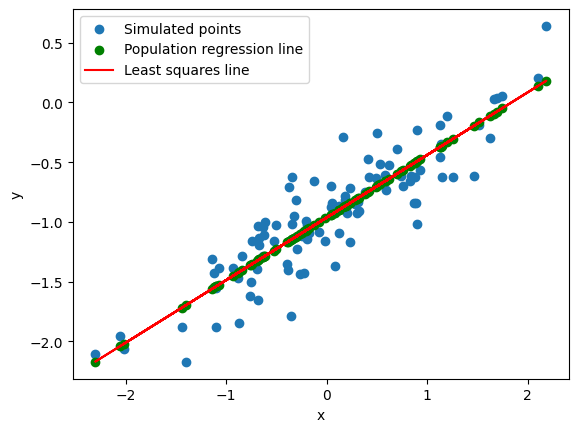

In [ ]:
# Puntos generados
plt.scatter(x, y, label = 'Simulated points')
# Puntos de la regresión poblacional
y_pred = coefficients_lineal[0] + coefficients_lineal[1] * x
plt.scatter(x, y_pred, color='green', label='Population regression line')
# Regresión lineal de minimos cuadrados
plt.plot(x, coefficients_lineal[0] + coefficients_lineal[1] * x, color='red', label='Least squares line')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Punto g**

Now ft a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

Coeficientes: [ 0.00385565  0.52340491 -0.9662543 ]


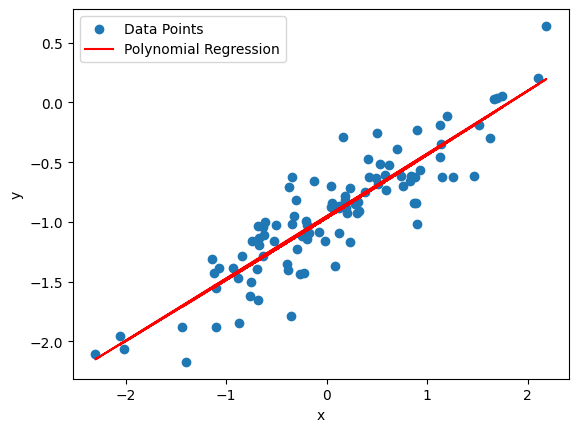

In [ ]:
# Grado de la regresión
degree = 2
# Modelo de regresion polimonica y calculo de coeficientes
coefficients_poly = np.polyfit(x, y, degree)
poly_function = np.poly1d(coefficients_poly)
# Gráfica con el nuevo modelo
plt.scatter(x, y, label='Data Points')
y_pred = poly_function(x)
plt.plot(x, coefficients_poly[0] * x**2 + coefficients_poly[1] * x + coefficients_poly[2], color='red', label='Polynomial Regression')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
print("Coeficientes:", coefficients_poly)
plt.show()

In [ ]:
# Valores ajustados del modelo de regresión lineal
y_pred = np.dot(X_design, coefficients_lineal)
# Calcular R^2
r2 = r2_score(y, y_pred)
print("R^2 modelo lineal:", r2)

# Valores ajustados del ajuste polinómico
y_pred = poly_function(x)
# Calcular R^2
r2 = r2_score(y, y_pred)
print("R^2 modelo polinomico:", r2)

R^2 modelo lineal: 0.7997346204862734
R^2 modelo polinomico: 0.7998024699274676


Podemos ver que el coeficiente cuadratico tiene un valor muy pequeño, lo cual genera que el R<sup>2</sup> de ambos modelos no tengan una diferencia significativa, es decir que el modelo polinomico no mejora el modelo.

Por la formula sabemos que esto es un modelo lineal y por eso es que el nuevo coeficiente en el modelo cuadratico es muy pequeño, por lo tanto, si caluclamos el p-valor de este coeficiente nos podremos dar cuenta que no es estadísticamente significativo así que es mejor realizar un modelo lineal.

**Punto h**

Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

Coeficientes: [-0.99876907  0.49589413]


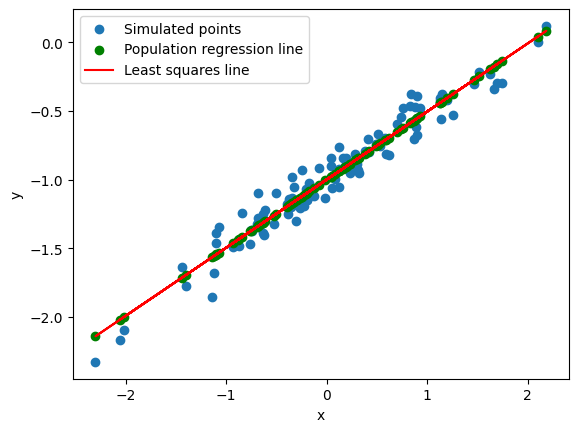

In [ ]:
# Error y modelo con menos varianza
eps = np.random.normal(scale=0.1, size=100)
y_less_noise = -1 + np.dot(0.5, x) + eps

# Regresión lineal de minimos cuadrados y calculo de los coeficientes
X_design = np.column_stack((np.ones(x.shape[0]), x))
coefficients = np.linalg.lstsq(X_design, y_less_noise, rcond=None)[0]
print("Coeficientes:", coefficients)

# Gráfica del nuevo modelo
plt.scatter(x, y_less_noise)
y_pred = coefficients[0] + coefficients[1] * x
plt.scatter(x, y_pred, color='green', label='Population Regression Line')
plt.plot(x, coefficients[0] + coefficients[1] * x, color='red', label='Fitted Line')
plt.legend(['Simulated points', 'Population regression line', 'Least squares line'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Valores ajustados del modelo de regresión lineal
y_pred = np.dot(X_design, coefficients)
# Calcular R^2
r2 = r2_score(y_less_noise, y_pred)
print("R^2 modelo lineal con menos ruido:", r2)

R^2 modelo lineal con menos ruido: 0.9502569792184367


La diferencia entre $\hat{\beta}$<sub>0</sub> y $\beta$<sub>0</sub> es de 0.00123093 (0.123%) y la diferencia entre $\hat{\beta}$<sub>1</sub> y $\beta$<sub>1</sub> es de 0.00410587 (0.821%). Los coeficientes son más parecidos cuando el modelo tiene menos ruido.

Tambien el R<sup>2</sup> mejora en el modelo con menos ruido.

**Punto i**

Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

Coeficientes: [-1.0097732   0.42604299]


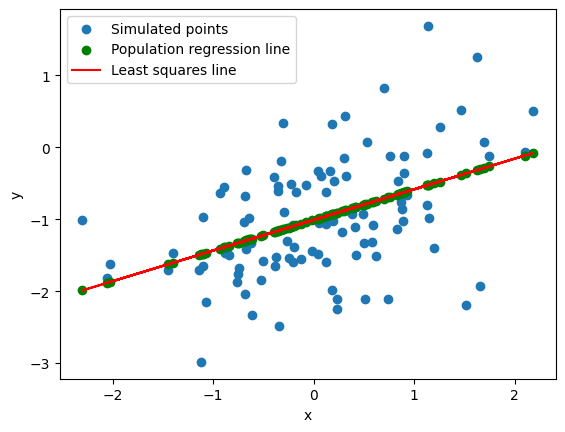

In [ ]:
# Error y modelo con más varianza
eps = np.random.normal(scale=0.7, size=100)
y_more_noise = -1 + np.dot(0.5, x) + eps

# Regresión lineal de minimos cuadrados y calculo de los coeficientes
X_design = np.column_stack((np.ones(x.shape[0]), x))
coefficients = np.linalg.lstsq(X_design, y_more_noise, rcond=None)[0]
print("Coeficientes:", coefficients)

# Gráfica del nuevo modelo
plt.scatter(x,y_more_noise)
y_pred = coefficients[0] + coefficients[1] * x
plt.scatter(x, y_pred, color='green', label='Population Regression Line')
plt.plot(x, coefficients[0] + coefficients[1] * x, color='red', label='Fitted Line')
plt.legend(['Simulated points', 'Population regression line', 'Least squares line'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Valores ajustados del modelo de regresión lineal
y_pred = np.dot(X_design, coefficients)
# Calcular R^2
r2 = r2_score(y_more_noise, y_pred)
print("R^2 modelo lineal con menos ruido:", r2)

R^2 modelo lineal con menos ruido: 0.20519160406831782


La diferencia entre $\hat{\beta}$<sub>0</sub> y $\beta$<sub>0</sub> es de -0.00977320 (0.977%) y la diferencia entre $\hat{\beta}$<sub>1</sub> y $\beta$<sub>1</sub> es de 0.00410587 (14.791%). Los coeficientes son menos parecidos cuando el modelo tiene más ruido.

Tambien el R<sup>2</sup> empeora en este modelo respecto a los otros dos modelos lineales (el original y el de menos rudio).  

En conclusión, entre menos ruido haya, más ajustado va a ser el modelo entonces los coeficientes serán más parecidos a los teoricos y mejor va a ser el R<sup>2</sup>. Al contrario, cuando más ruido hay, menos ajustado va a ser el modelo entonces los coeficientes serán menos parecidos a los teoricos y el R<sup>2</sup> va a empeorar.

**Punto j**

What are the confdence intervals for $\beta$<sub>0</sub> and $\beta$<sub>1</sub> based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [ ]:
def confidence_interval(confidence_level, y, model):
    # Media
    sample_mean = np.mean(y)
    # Desviación estandar
    sample_std = np.std(y)
    # Error estandar
    standard_error = sample_std / np.sqrt(len(y))

    # Calculate the confidence interval
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * standard_error
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    # Print the confidence interval
    print(f"Intervalo de confianza ({int(confidence_level * 100)}%) - Modelo {model} =", confidence_interval)

In [ ]:
confidence_interval(0.95, y, 'lineal')
confidence_interval(0.95, y_less_noise, 'lineal con menos ruido')
confidence_interval(0.95, y_more_noise, 'lineal con más ruido')

Intervalo de confianza (95%) - Modelo lineal = (-1.0331365359022016, -0.8298832232120005)
Intervalo de confianza (95%) - Modelo lineal con menos ruido = (-1.0569808009622073, -0.8804719680095767)
Intervalo de confianza (95%) - Modelo lineal con más ruido = (-1.1471328025834537, -0.820791802173761)


Cuando hay mucho ruido en los datos, es más difícil para el modelo hacer predicciones precisas, lo que resulta en una mayor incertidumbre en las estimaciones y, por lo tanto, en un intervalo de confianza más amplio. Al contario, un modelo con poco ruido en los datos debería ser más preciso en sus estimaciones, lo que resultaría en un intervalo de confianza más estrecho, ya que las estimaciones están más cerca del valor real.

Por lo tanto, el intervalo de confianza más amplio es el del modelo con más rudio, luego le sigue el modelo original y por ultimo le sigue el modelo con menos ruido.

## Sección 3.7 - Punto 14

**Punto a**

Perform the following commands in Python:

```
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
```

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

La forma del modelo es:

$y = β_0 + β_1 x_1 + β_2 x_2 + ɛ$

Los coeficientes son:

$β_0 = 2$  
$β_1 = 2$  
$β_2 = 0.3$  



**Punto b**

What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

Coreficiente de correlacion: 0.772324497691354


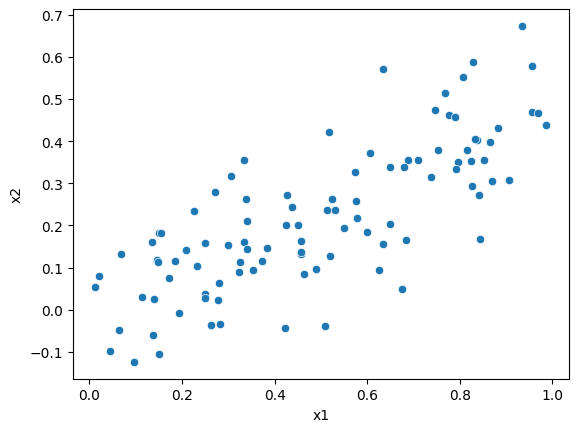

In [ ]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
sns.scatterplot(x='x1', y='x2', data=df)

print(f'Coreficiente de correlacion: {str(np.corrcoef(x1, x2)[0][1])}')

**Punto c**

Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{β}0$, $\hat{β}1$, and $\hat{β}2$? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [ ]:
import statsmodels.formula.api as smf

f = 'y ~ x1 + x2'
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           5.76e-08
Time:                        01:01:48   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

- $\hat{β_0} = 1.9579$  
- $\hat{β_1} = 1.6154$  
- $\hat{β_2} = 0.9428$  

H0 : β1 = 0 -> Dado el bajo valor p de 0.003 se puede rechazar la hipotesis nula.

H0 : β2 = 0 -> En este caso el valor p es alto (0.259) entonces no se puede rechazar la hipotesis nula.


**Punto d**

Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0: β1 = 0?

In [ ]:
f = 'y ~ x1'
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.37e-08
Time:                        01:01:59   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.0

$\hat{β_1} = 2.0771$

Dado que el valor p es 0 se puede rechazar la hipotesis nula H0: β1 = 0


**Punto e**

Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0: β1 = 0?

In [ ]:
f = 'y ~ x2'
model = smf.ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           7.43e-07
Time:                        01:02:12   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

$\hat{β_2} = 2.0771$

Dado que el valor p es 0 se puede rechazar la hipotesis nula H0: β2 = 0 (Esto indica una aparente contradiccion con el punto c)

**Punto f**

Do the results obtained in (c)–(e) contradict each other? Explain your answer.

Los resultados no se contradicen.

La supuesta contradicción viene del hecho de que en el modelo con x1 y x2 como predictores, la variable x2 no resulta significativa. Pero al probar el modelo con solo x2, resulta que sí es significativa. El gráfico del punto b sugiere una alta correlación entre las variables, resultando en que x2 no aporta suficiente información nueva al ajustar un modelo que ya contiene x1. El hecho de que x2 pueda ser significativa por sí sola y no sea significativa en presencia de x1, se debe a que x1 y x2 están altamente correlacionadas, por lo que el uso de ambas variables implica que la información proporcionada por una de ellas es redundante.

**Punto g**

Now suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

```
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
```
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [ ]:
sample = {'x1': .1, 'x2': .8, 'y': 6}
df_g = df._append(sample, ignore_index=True)

# Modelo C
model_c = smf.ols(formula='y ~ x1 + x2', data=df_g).fit()
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.60e-08
Time:                        01:02:22   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

In [ ]:
# Modelo D
model_d = smf.ols(formula='y ~ x1', data=df_g).fit()
print(model_d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           9.23e-07
Time:                        01:02:25   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.0

In [ ]:
# Modelo E
model_e = smf.ols(formula='y ~ x2', data=df_g).fit()
print(model_e.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.13e-08
Time:                        01:02:28   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.0

Efectos en los modelos:
- Modelo C: El valor de los coeficientes cambio, x1 disminuyo y x2 aumento. Ahora se puede rechazar la hipótesis nula para ambas variables.
- Modelo D: El valor de R cuadrado disminuyo (la capacidad predictiva del modelo baja).
- Modelo E: El valor de R cuadrado aumento (la capacidad predictiva del modelo sube).

<Axes: xlabel='x1', ylabel='x2'>

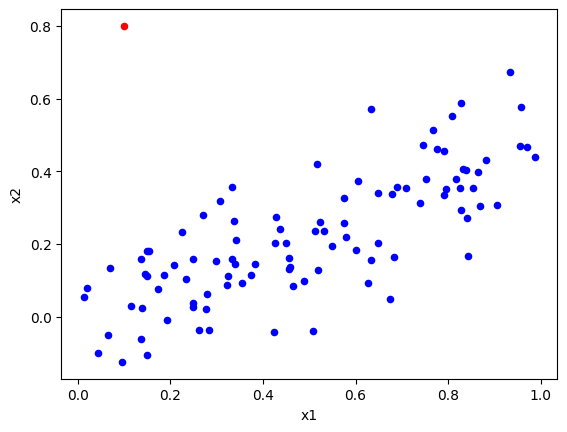

In [ ]:
last_sample = df_g.iloc[-1:]  # ultima observacion
samples = df_g.iloc[:-1]  # todad las observaciones menos la ultima
ax = samples.plot(kind='scatter',x='x1',y='x2', color='blue')
last_sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red')

El punto rojo representa un punto influyente cuando comparamos las variables predictoras.

<Axes: xlabel='x1', ylabel='y'>

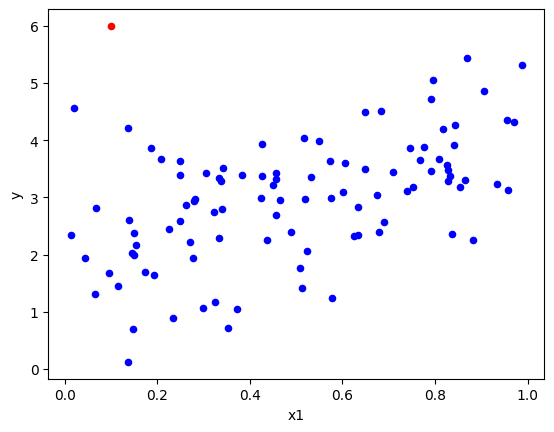

In [ ]:
ax = samples.plot(kind='scatter',x='x1',y='y', color='blue')
last_sample.plot(ax=ax, kind='scatter',x='x1',y='y', color='red')

- El punto rojo no sigue la tendencia, entonces sería un outlier.
- No es un punto influyente, ya que es un valor usual para X1.

<Axes: xlabel='x2', ylabel='y'>

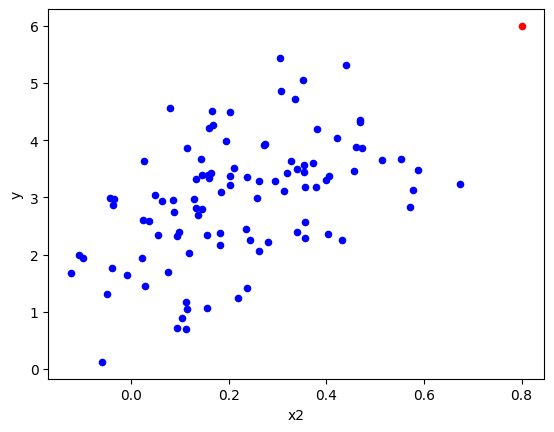

In [ ]:
ax = samples.plot(kind='scatter',x='x2',y='y', color='blue')
last_sample.plot(ax=ax, kind='scatter',x='x2',y='y', color='red')

- El punto rojo no sigue la tendencia, entonces sería un outlier.
- El punto rojo es un punto influyente, ya que es un valor inusual para x2.

La observación añadió influencias significativas en el modelo. En este caso, la variable x2 paso de ser insignificante a tener peso con una sola observación extra.

Finalmente, de acuerdo a los gráficos anteriores, la observación añadida es un punto influyente y un outlier porque se puede ver como se comporta de forma distinta a las demás observaciones.